In [29]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

18:19:24 - cmdstanpy - INFO - Chain [1] start processing
18:19:24 - cmdstanpy - INFO - Chain [1] done processing


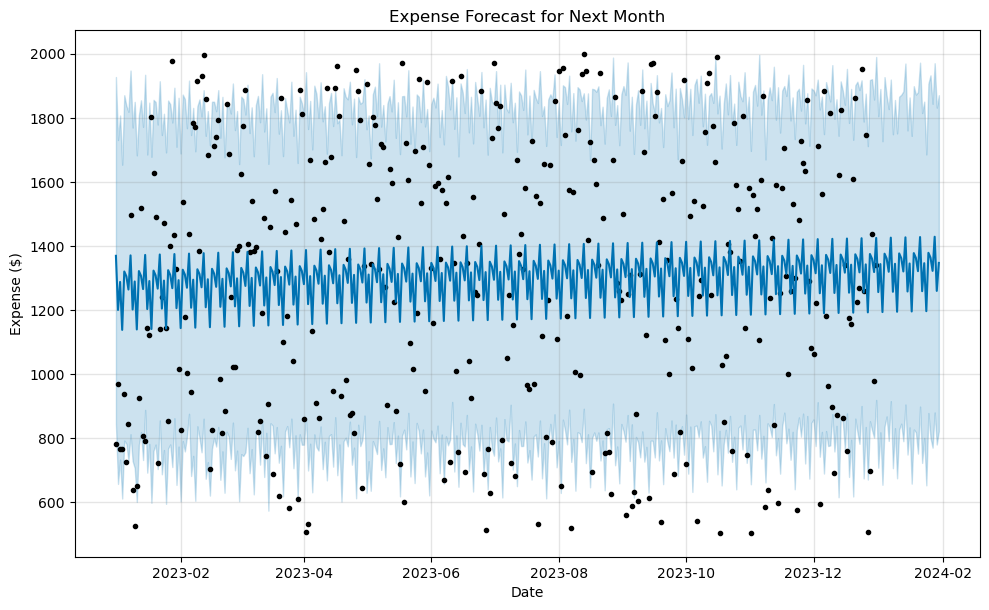

            ds         yhat  yhat_lower   yhat_upper
365 2024-01-01  1255.494461  707.172067  1804.616510
366 2024-01-02  1342.892440  817.644656  1889.599207
367 2024-01-03  1193.097501  653.802622  1726.513605
368 2024-01-04  1375.372323  835.571408  1926.694576
369 2024-01-05  1360.375553  867.228511  1868.855201
370 2024-01-06  1318.957546  790.791159  1826.835812
371 2024-01-07  1425.473836  914.970959  1919.005171
372 2024-01-08  1256.421713  705.653914  1748.205478
373 2024-01-09  1343.819692  830.540519  1855.191245
374 2024-01-10  1194.024753  674.130083  1750.966452
375 2024-01-11  1376.299575  826.332146  1865.551895
376 2024-01-12  1361.302805  844.664720  1871.306895
377 2024-01-13  1319.884798  789.888667  1882.096729
378 2024-01-14  1426.401088  904.481390  1969.003467
379 2024-01-15  1257.348965  748.193777  1760.153981
380 2024-01-16  1344.746944  833.120219  1863.164473
381 2024-01-17  1194.952005  657.418494  1743.116195
382 2024-01-18  1377.226827  826.429283  1898.

In [38]:
# REGULAR DATASET NO FLUCTUATION

# Generating a simulated AWS expense dataset
start_date = '2023-01-01'
end_date = '2023-12-31'

dates = pd.date_range(start=start_date, end=end_date)
expenses = []

for date in dates:
    # Simulating varying expenses based on different services or instances
    expense = np.random.randint(500, 2000)  # Adjust the range based on your scenario
    expenses.append(expense)

# Creating the DataFrame
df = pd.DataFrame({'ds': dates, 'y': expenses})

# Fitting Prophet model
model = Prophet()
model.fit(df)

# Creating a dataframe for the next month
future = model.make_future_dataframe(periods=30)  # Forecasting for the next month
forecast = model.predict(future)

# Plotting the forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Expense ($)')
plt.title('Expense Forecast for Next Month')
plt.show()

# Displaying forecasted values for the next month
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

#MAPE = 35%

22:51:23 - cmdstanpy - INFO - Chain [1] start processing
22:51:23 - cmdstanpy - INFO - Chain [1] done processing


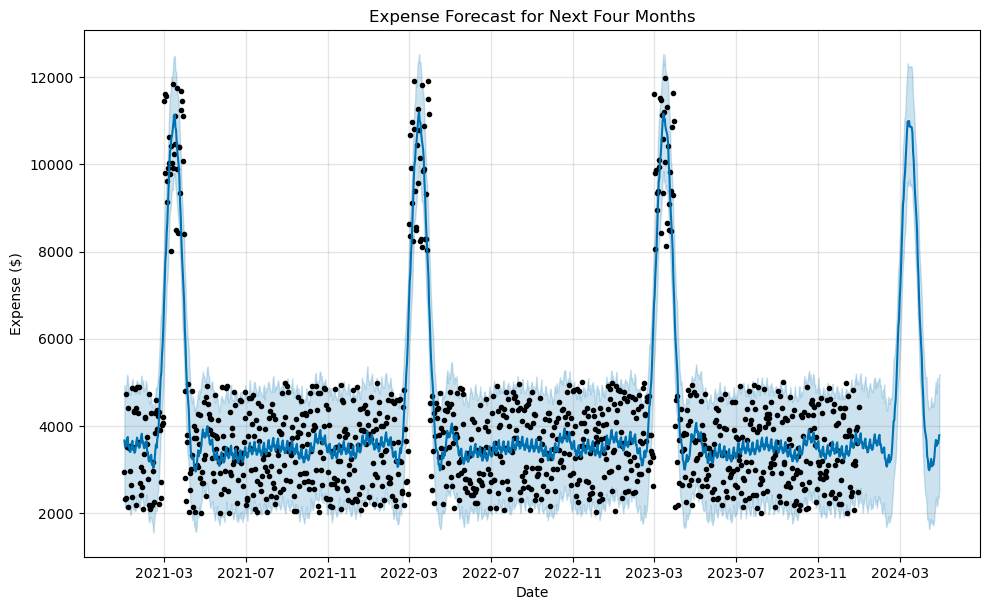

             ds         yhat   yhat_lower   yhat_upper
1095 2024-01-01  3671.166438  2228.804058  5006.086088
1096 2024-01-02  3783.715216  2380.833805  5145.475291
1097 2024-01-03  3829.179171  2573.589915  5205.645859
1098 2024-01-04  3605.110801  2224.733967  4854.181694
1099 2024-01-05  3634.250790  2304.403369  4979.102725
...         ...          ...          ...          ...
1210 2024-04-25  3539.549082  2204.984070  4746.873445
1211 2024-04-26  3652.664813  2160.179541  5104.354263
1212 2024-04-27  3584.362184  2383.938424  4910.263871
1213 2024-04-28  3647.041236  2334.487464  4905.266795
1214 2024-04-29  3781.874722  2540.190279  5190.483078

[120 rows x 4 columns]


In [41]:
# HIGHER EXPENSE IN MARCH

# Generating four years of data
start_date = '2021-01-01'
end_date = '2023-12-31'

dates = pd.date_range(start=start_date, end=end_date)
expenses = []

for date in dates:
    if date.month == 3:  # March
        expense = np.random.randint(8000, 12000)  # Higher expense in March
    else:
        expense = np.random.randint(2000, 5000)  # Lower expense in other months
    expenses.append(expense)

# Creating the DataFrame
df = pd.DataFrame({'ds': dates, 'y': expenses})

# Fitting Prophet model
model = Prophet()
model.fit(df)

# Creating a dataframe for the next four months
future = model.make_future_dataframe(periods=4 * 30)  # Forecasting for the next four months
forecast = model.predict(future)

# Plotting the forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Expense ($)')
plt.title('Expense Forecast for Next Four Months')
plt.show()

# Displaying forecasted values for the next four months
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(120))

#MAPE = 25%


18:17:08 - cmdstanpy - INFO - Chain [1] start processing
18:17:09 - cmdstanpy - INFO - Chain [1] done processing


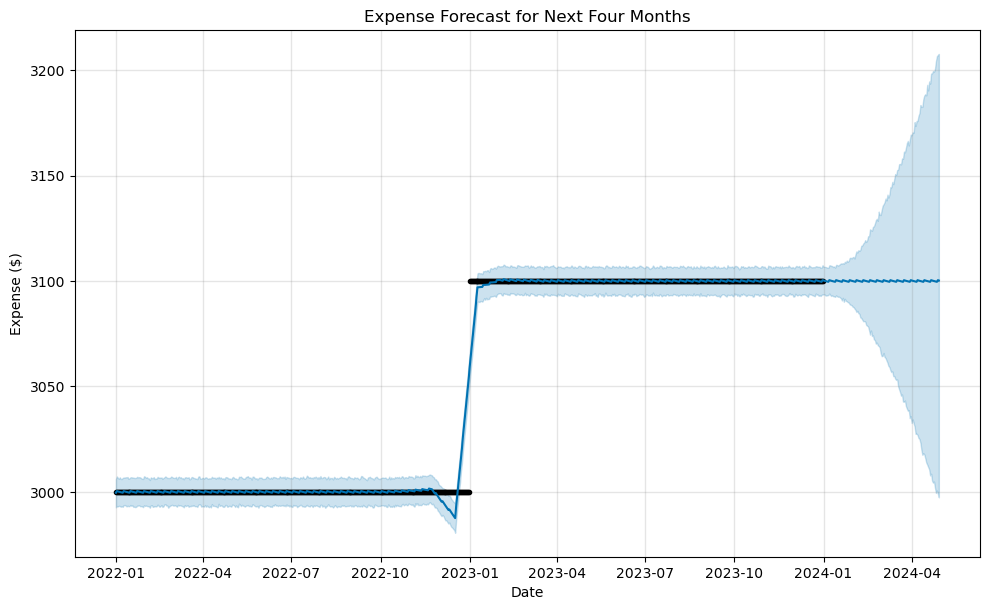

            ds         yhat   yhat_lower   yhat_upper
730 2024-01-01  3100.237874  3093.612457  3106.765327
731 2024-01-02  3100.109822  3093.660681  3106.708867
732 2024-01-03  3099.981770  3093.148301  3106.655722
733 2024-01-04  3099.861085  3093.072559  3106.500170
734 2024-01-05  3099.740401  3093.239875  3106.282562
..         ...          ...          ...          ...
845 2024-04-25  3099.854964  3001.965133  3200.577334
846 2024-04-26  3099.734279  2999.530023  3204.245147
847 2024-04-27  3099.617092  3000.642525  3206.589255
848 2024-04-28  3100.399348  2999.145404  3207.149305
849 2024-04-29  3100.231369  2997.419766  3207.656541

[120 rows x 4 columns]


In [35]:
#EXPENSE INCREASE EVERY YEAR

# Generating data with increasing expenses each year
start_date = '2022-01-01'
end_date = '2023-12-31'

dates = pd.date_range(start=start_date, end=end_date)
expenses = []

for i, date in enumerate(dates):
    # Generating increasing expenses for each year
    expense = 3000 + (i // 365) * 100  # Increasing by 100 every year
    expenses.append(expense)

# Creating the DataFrame
df = pd.DataFrame({'ds': dates, 'y': expenses})

# Fitting Prophet model
model = Prophet()
model.fit(df)

# Creating a dataframe for the next four months
future = model.make_future_dataframe(periods=4 * 30)  # Forecasting for the next four months
forecast = model.predict(future)

# Plotting the forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Expense ($)')
plt.title('Expense Forecast for Next Four Months')
plt.show()

# Displaying forecasted values for the next four months
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(120))

#MAPE = 0.01%

18:17:28 - cmdstanpy - INFO - Chain [1] start processing
18:17:28 - cmdstanpy - INFO - Chain [1] done processing


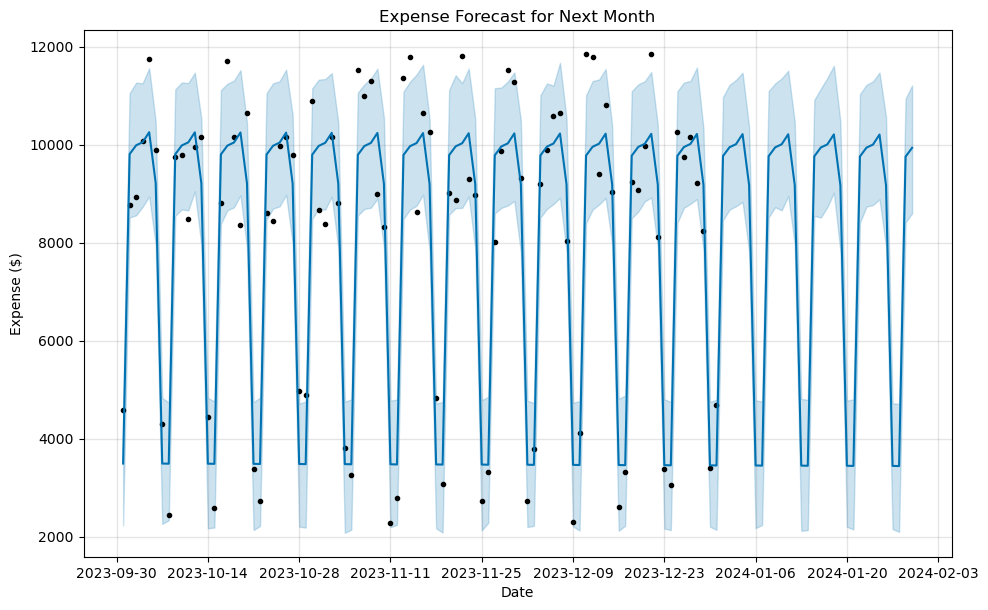

            ds          yhat   yhat_lower    yhat_upper
92  2024-01-01   9765.520407  8457.314528  10970.287385
93  2024-01-02   9945.132200  8670.545251  11217.639818
94  2024-01-03  10008.364313  8741.003485  11319.202306
95  2024-01-04  10212.807059  8827.889829  11465.013122
96  2024-01-05   9174.205112  7827.019790  10359.533367
97  2024-01-06   3450.111172  2171.647063   4777.887695
98  2024-01-07   3446.806902  2235.852420   4754.736787
99  2024-01-08   9762.498657  8514.513706  11091.505545
100 2024-01-09   9942.110450  8721.352870  11245.356149
101 2024-01-10  10005.342563  8656.864267  11349.420637
102 2024-01-11  10209.785308  8949.790179  11506.826520
103 2024-01-12   9171.183362  7966.719116  10457.634371
104 2024-01-13   3447.089422  2117.493120   4808.923183
105 2024-01-14   3443.785152  2129.507882   4790.017888
106 2024-01-15   9759.476907  8544.756137  10912.174534
107 2024-01-16   9939.088700  8508.379152  11138.980749
108 2024-01-17  10002.320812  8724.076497  11359

In [36]:
# TREND WHERE WEEKEND EXPENSE IS LESSER

# Generating data with lower expenses on weekends and higher on weekdays
start_date = '2023-10-01'
end_date = '2023-12-31'

dates = pd.date_range(start=start_date, end=end_date)
expenses = []

for date in dates:
    if date.dayofweek < 5:  # Monday to Friday (Weekdays)
        expense = np.random.randint(8000, 12000)  # Higher expense on weekdays
    else:
        expense = np.random.randint(2000, 5000)  # Lower expense on weekends
    expenses.append(expense)

# Creating the DataFrame
df = pd.DataFrame({'ds': dates, 'y': expenses})

# Fitting Prophet model
model = Prophet()
model.fit(df)

# Creating a dataframe for the next month
future = model.make_future_dataframe(periods=30)  # Forecasting for the next month
forecast = model.predict(future)

# Plotting the forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Expense ($)')
plt.title('Expense Forecast for Next Month')
plt.show()

# Displaying forecasted values for the next month
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

#MAPE = 85%


14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing


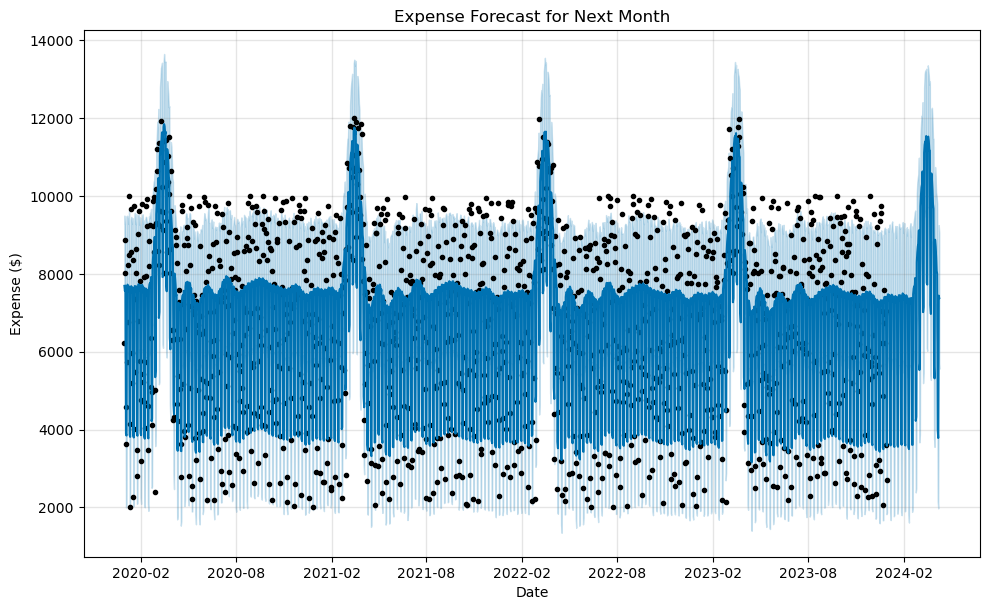

             ds         yhat   yhat_lower   yhat_upper
1061 2022-11-27  3708.466008  1793.018449  5402.752261
1062 2022-11-28  7509.346850  5652.022018  9333.678260
1063 2022-11-29  7570.637043  5755.304286  9251.102339
1064 2022-11-30  7531.087683  5783.927356  9281.206274
1065 2022-12-01  7382.129708  5474.691449  9079.942032
...         ...          ...          ...          ...
1556 2024-04-05  7997.246294  6271.063567  9801.271359
1557 2024-04-06  4004.177917  2157.269573  5720.445032
1558 2024-04-07  3783.045206  1976.465318  5627.471721
1559 2024-04-08  7436.477022  5709.113384  9246.573382
1560 2024-04-09  7373.069679  5559.677225  9056.392196

[500 rows x 4 columns]


In [33]:
# MERGING WEEKEND EXPENSE AND MONTHLY HIGHS

# Generating data with varying expenses based on weekdays, weekends, and March
start_date = '2020-01-01'
end_date = '2023-12-31'

dates = pd.date_range(start=start_date, end=end_date)
expenses = []

for date in dates:
    if date.month == 3:  # March
        expense = np.random.randint(8000, 12000)  # Higher expense in March
    elif date.dayofweek < 5:  # Weekdays (Monday to Friday)
        expense = np.random.randint(5000, 10000)  # Higher expense on weekdays
    else:  # Weekends (Saturday and Sunday)
        expense = np.random.randint(2000, 5000)  # Lower expense on weekends
    expenses.append(expense)

# Creating the DataFrame
df = pd.DataFrame({'ds': dates, 'y': expenses})

# Fitting Prophet model
model = Prophet()
model.fit(df)

# Creating a dataframe for the next month
future = model.make_future_dataframe(periods=100)  # Forecasting for the next month
forecast = model.predict(future)

# Plotting the forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Expense ($)')
plt.title('Expense Forecast for Next Month')
plt.show()

# Displaying forecasted values for the next month
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(500))
